# Fitness Comparisons

This notebook examines cases where individuals should join a group of size $x-1$ to form a group of size $x$, or when they should leave a group of size $x$ to be alone

We do this by plotting the regions in which $W(x) > W(1)$ (or vice versa)

# Load Packages and Global Variables

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from fitness_funs_non_dim import *
from sim_graph_funs import *

In [6]:
colors_x = ['k', 'b', 'r', 'm']

# Functions Specific to this Notebook

In [17]:
H1 = None
H2 = 2
α2_fun_type = 'constant'
params_base = dict(β1=1, β2=1, H1=H1, H2=H2, A=0.5,
               α1_of_1=0.05, α2_of_1=0.95, 
               s1=2, s2=2, 
               α2_fun_type=α2_fun_type)
# Define the range for N1
N1_values = np.linspace(0.01, 1, 1000)
N2 = 1#0.5  # Example value for N2
# pairs form
b_ratio_pairs = np.array([curve_xgroup_form(2,N1,N2,**params_base.copy()) for N1 in N1_values])
b_ratio_trios = np.array([curve_xgroup_form(3,N1, N2,**params_base.copy()) for N1 in N1_values])

In [21]:
def curve_xgroup_form(x,N1,N2,**params):
    '''
    Finds the beta1/beta2 curve such that if beta1/beta2 above this curve, 
    groups of size x should form
    '''
    # compares fitness in grouop of size x to size 1
    # per capita fun responses

    # if H1 is calculated using scaling law
    if params['H1'] == None: # so H1 = H2 * β1/β2
        # makes using alpha1 and alpha2 easier
        α1 = lambda x: fun_alpha1(x,**params.copy())
        α2 = lambda x: fun_alpha2(x,**params.copy())
        
        denominator = N1 * (α1(x)/x - α1(1))
        if denominator > 0:
            numerator = N2 * (α2(1) - α2(x) /x)
            bratio_curve = numerator/denominator
            return bratio_curve
        else:
            return np.nan
    # if H1 is set parameter
    else:
        Y1_1 = fun_f1(1,N1,N2,**params)
        Y1_2 = (1/x) * fun_f1(x,N1,N2,**params)
        Y2_1 = fun_f2(1,N1,N2,**params)
        Y2_2 = (1/x)*fun_f2(x,N1,N2,**params)

        denominator = Y1_2 - Y1_1
        if denominator > 0:
            bratio_curve = (Y2_1 - Y2_2) / denominator
            return bratio_curve
        else:
            return np.nan



def plot_conditions_x_form(x, H1, H2, α2_fun_type, fig = None, ax = None, if_legend = False, 
                           color = 'b', s1 = 2, s2 = 2, α2_of_1 = 0.95, β1=1, β2=1,A=0.5,
                   α1_of_1=0.05, **params):
    '''
    plots beta1/beta2 curve at boundary, using curve_xgroups_form, 
    where groups of size x (listed in xvals) should form when
    solitaries and groups of size x - 1 meet

    parameters:
        Required:
        x - group size
        H1, H2 - handling times of big prey and small prey. If H1 = None, assumes H1/H2 = beta1/beta2
        α2_fun_type: "sigmoid" or "constant"
        optional parameters: for other function parameters in params_base, 
        also for determining figure/ax etc
    returns:
    ax, fig
    '''
    # plots regions where groups of size x (listed in xvals) forms
    # xvals can have up to 2 entries
    params_base = dict(β1=β1, β2=β2, H1=H1, H2=H2, A=A,
                   α1_of_1 = α1_of_1, α2_of_1=α2_of_1, 
                   s1=s1, s2=s2, 
                   α2_fun_type=α2_fun_type)
                
    # Define the range for N1
    N1_values = np.linspace(0.1, 1, 1000)
    N2 = 1#0.5  # Example value for N2
    
    β1_values = np.array([curve_xgroup_form(x,N1,N2,**params_base.copy()) for N1 in N1_values])
    if fig == None:
        fig, ax = plt.subplots(1, 1)
    ax.plot(β1_values, N1_values, color=color, label = '$x=$'+'%d'%x)
    
    # Format the plot using the provided function
    format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, 
              if_legend = if_legend, xlim = [1,10])
    return ax, fig

def plot_conditions_for_2_3_form(H1, H2, α2_fun_type, s1 = 2, s2 = 2, α2_of_1 = 0.95, β1=1, β2=1,A=0.5,
                   α1_of_1=0.05, **params):
    # plots regions where groups of size x (listed in xvals) forms
    # xvals can have up to 2 entries

            
    params_base = dict(β1=β1, β2=β2, H1=H1, H2=H2, A=A,
                   α1_of_1 = α1_of_1, α2_of_1=α2_of_1, 
                   s1=s1, s2=s2, 
                   α2_fun_type=α2_fun_type)
    
    # Define the range for N1
    N1_values = np.linspace(0.01, 1, 1000)
    N2 = 1 #0.5  # Example value for N2
    # pairs form
    b_ratio_pairs = np.array([curve_xgroup_form(2,N1,N2,**params_base.copy()) for N1 in N1_values])
    #trios form
    b_ratio_trios = np.array([curve_xgroup_form(3,N1, N2,**params_base.copy()) for N1 in N1_values])
    
    fig, ax = plt.subplots(1, 1)
    # Plot curves
    ax.plot(b_ratio_pairs, N1_values, color='b')
    ax.plot(b_ratio_trios, N1_values, color='r')
    
    # Fill regions
    x_right = 10
    ax.fill_betweenx(N1_values, b_ratio_pairs, x_right, color='blue', alpha=0.3, label='Pairs Form')
    ax.fill_betweenx(N1_values, b_ratio_trios, x_right, color='red', alpha=0.3, label='Trios Form')
    
    
    # Format the plot using the provided function
    #fig.savefig(final_fig_path + 'N1_to_form_grps_beta1.png', bbox_inches = 'tight', dpi = 600)
    
        
    format_ax(ax, r'Max Benefit Ratio, $\beta_1/\beta_2$', N1lab, 
              if_legend=True, xlim = [1,x_right])

# def plot_conditions_pairs_form(H1, H2, α2_fun_type):
#     # plots regions where groups of size x (listed in xvals) forms
#     # xvals can have up to 2 entries

            
#     params_base = dict(β1=1, β2=1, H1=H1, H2=H2, A=0.5,
#                    α1_of_1=0.05, α2_of_1=0.95, 
#                    s1=2, s2=2, 
#                    α2_fun_type=α2_fun_type)

    
#     # Define the range for N1
#     N1_values = np.linspace(0.1, 1, 1000)
#     N2 = 1#0.5  # Example value for N2
    
#     β1_values = np.array([curve_xgroup_form(2,N1,N2,**params_base.copy()) for N1 in N1_values])
#     fig, ax = plt.subplots(1, 1)
#     ax.plot(β1_values, N1_values, color='b')
    
#     # Format the plot using the provided function
#     format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, if_legend=False, xlim = [1,10])
#     return ax, fig

# Condition for pairs to form, $H_1 = H_2 (\beta_1/\beta_2)$...

# Condition for Pairs to Form

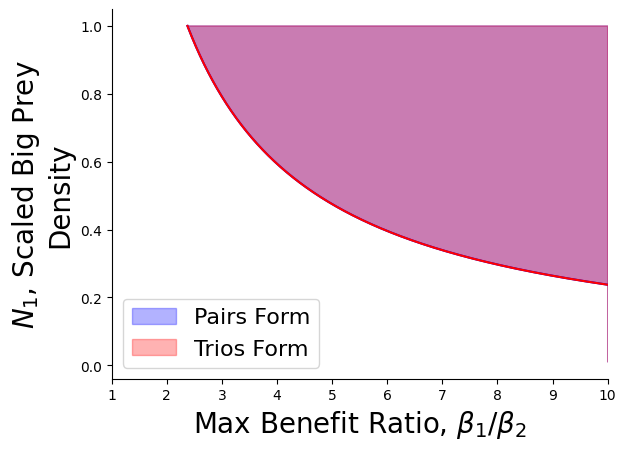

In [22]:
plot_conditions_for_2_3_form(H1=None, H2=1, α2_fun_type='constant', α2_of_1=0.95)

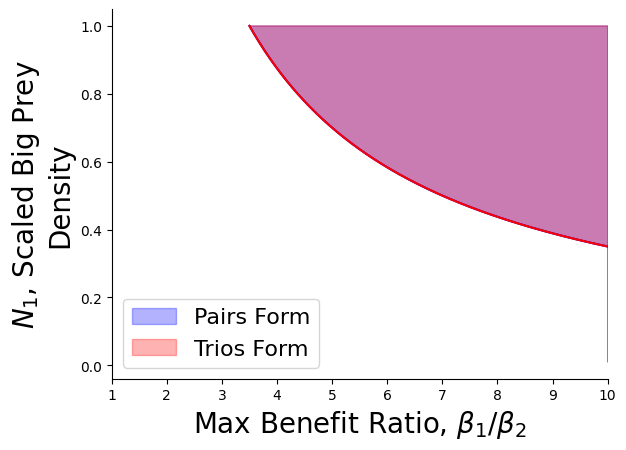

In [23]:
plot_conditions_for_2_3_form(H1=None, H2=2, α2_fun_type='sigmoid')

## Curves

In [36]:
def plot_set_of_curves(H1, H2, α2_fun_type, s1 = 2, s2 = 2):

    inputs = dict(H1=H1, H2=H2, α2_fun_type=α2_fun_type, s1 = s1, s2 = s2)
    ax, fig = plot_conditions_x_form(x=2, **inputs, fig = None, 
                                 ax = None, if_legend = False)

    plot_conditions_x_form(x=3, H1=H1, H2=H2, α2_fun_type=α2_fun_type, fig = fig, ax = ax, 
                       if_legend = True, color = 'k')
    plot_conditions_x_form(x=4, H1=H1, H2=H2, α2_fun_type=α2_fun_type, fig = fig, ax = ax, 
                       if_legend = True, color = 'r')
    plot_conditions_x_form(x=5, H1=H1, H2=H2, α2_fun_type=α2_fun_type, fig = fig, ax = ax, 
                       if_legend = True, color = 'magenta')
    return ax, fig

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


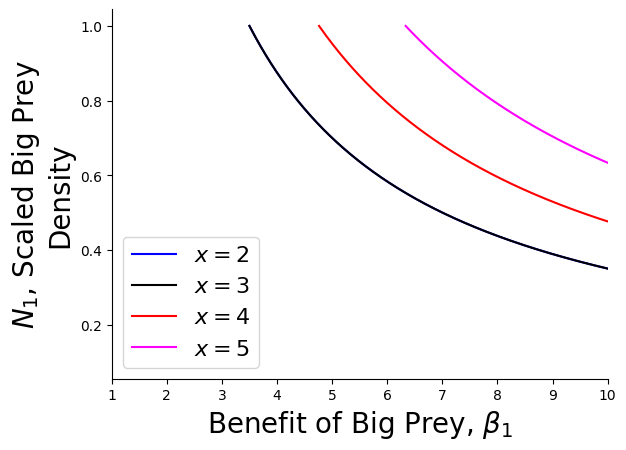

In [37]:
ax, fig = plot_set_of_curves(H1 = None, H2 = 1, α2_fun_type = 'sigmoid')
fig.savefig(final_fig_path + 'condition_x_forms_sigmoid.eps', **figure_ops)

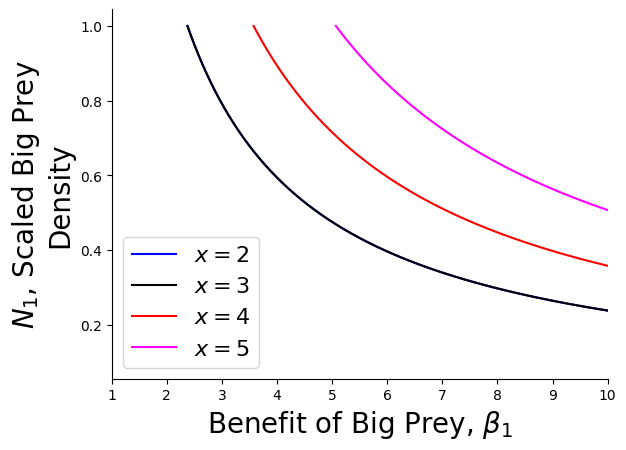

In [35]:
ax, fig = plot_set_of_curves(H1 = None, H2 = 1, α2_fun_type = 'constant')
#fig.savefig(final_fig_path + 'condition_x_forms_sigmoid.eps', **figure_ops)

# Big prey is harder to get....$s_1  = 3$

In [17]:
params_base = dict(β1 = 8, β2 = 1, H1=0, H2=0, 
                   α1_of_1 = 0.05, α2_of_1 = 0.95, 
                   s1 = 3, s2 = 2, 
                   α2_fun_type = 'sigmoid')

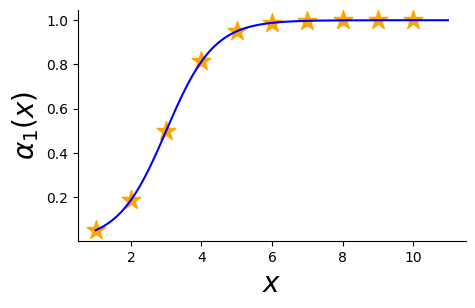

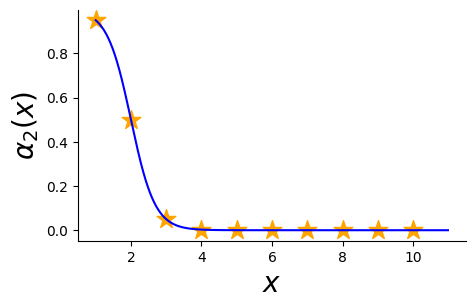

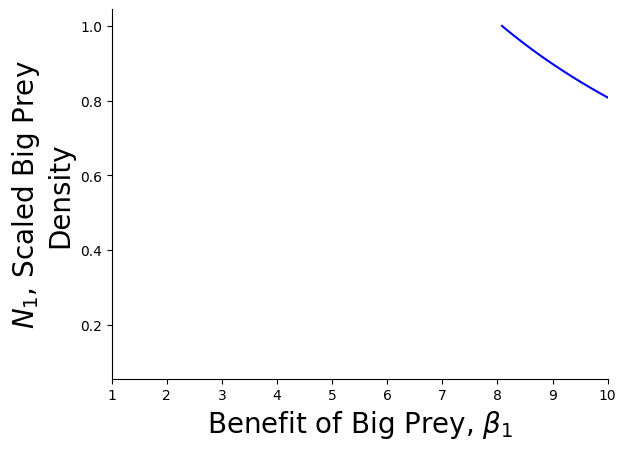

In [18]:
# plot corresponding capture probabilities
xvec = np.arange(1,11,1)
xvec_cont = np.arange(1,11,.01)
fig1, ax1 = plt.subplots(1,1,figsize = (5,3))
ax1.scatter(xvec, fun_alpha1(xvec,**params_base.copy()), marker='*', s=200, color = 'orange')
ax1.plot(xvec_cont, fun_alpha1(xvec_cont, **params_base.copy()), c='b')
format_ax(ax1,r'$x$',r'$\alpha_1(x)$', xlim = None, ylim=None,
              fs_labs = 20, fs_legend = 16, if_legend = False,
             ncol_legend = 1)

fig2, ax2 = plt.subplots(1,1, figsize = (5,3))
ax2.scatter(xvec, fun_alpha2(xvec,**params_base.copy()), marker='*', s=200, color = 'orange')
ax2.plot(xvec_cont, fun_alpha2(xvec_cont, **params_base.copy()), c='b')
format_ax(ax2,r'$x$',r'$\alpha_2(x)$', xlim = None, ylim=None,
              fs_labs = 20, fs_legend = 16, if_legend = False,
             ncol_legend = 1)


def curve_pairs_form(N1, N2, β2, **params):
    Y1_1 = fun_f1(1,N1,N2,**params)
    Y1_2 = fun_f1(2,N1,N2,**params)

    Y2_1 = fun_f2(1,N1,N2,**params)
    Y2_2 = fun_f2(2,N1,N2,**params)

    denominator = 0.5*Y1_2 - Y1_1
    β1_curve = β2 * (Y2_1 - 0.5*Y2_2) / denominator
    if denominator > 0:
        return β1_curve
    else:
        return np.nan


params = params_base.copy()
# Define the range for N1
N1_values = np.linspace(0.1, 1, 1000)
N2 = 0.5  # Example value for N2

β1_values = np.array([curve_pairs_form(N1, N2,**params) for N1 in N1_values])
fig, ax = plt.subplots(1, 1)
ax.plot(β1_values, N1_values, color='b')

# Format the plot using the provided function
format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, if_legend=False, xlim = [1,10])
#fig.savefig(final_fig_path + 'N1_to_form_grps_beta1.png', bbox_inches = 'tight', dpi = 600)


# Old Code

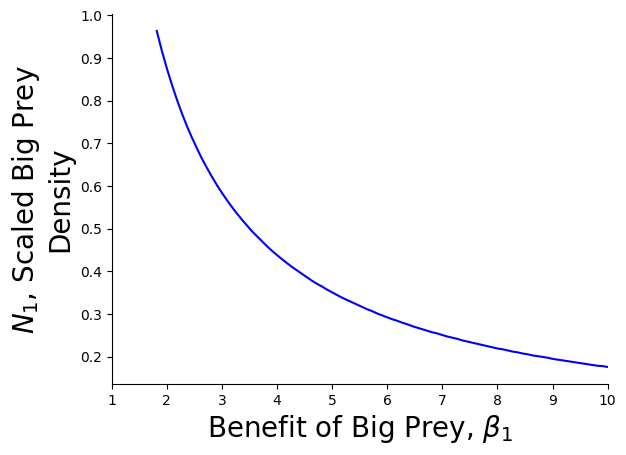

In [7]:
# Define the base parameters
H2 = 2

params_base = dict(β1=4, β2=1, H1=H2, H2=H2, 
                   α1_of_1=0.05, α2_of_1=0.95, 
                   s1=2, s2=2, A=0.5,
                   α2_fun_type='sigmoid')


# Define the range for N1
N1_values = np.linspace(0.1, 1, 1000)  # Finer range for N1
N2 = 0.5  # Example value for N2
x1, x2 = 1, 2  # Group sizes to compare
beta1_values = np.linspace(1,10,100)
    
# Prepare the data for plotting
N1_greater_fitness = []
N1_greater_fitness3 = []
'''
def compare_x_to_1(N1_greater_fitnessx, fitness_alone, fitness_x):
    greater_fitness_indices = np.where(fitness_x > fitness_alone)[0]
    if len(greater_fitness_indices) > 0:
        min_N1 = N1_values[greater_fitness_indices[0]]
    else:
        min_N1 = None
    N1_greater_fitnessx.append(min_N1)
    return N1_greater_fitnessx
'''
    
for beta1 in beta1_values:
    params = params_base.copy()
    params['β1'] = beta1
    params['H1'] = beta1*H2
    fitness_alone = per_capita_fitness_from_prey_non_dim(1, N1_values, N2, **params) # fitness of being alone
    fitness_pair = per_capita_fitness_from_prey_non_dim(2, N1_values, N2, **params) # fitness of being in a pair
    #fitness_trio = per_capita_fitness_from_prey_non_dim(3, N1_values, N2, **params) # fitness of being in a pair

    # find indices where fitness of being in a pair better than that of being alone
    greater_fitness_indices = np.where(fitness_pair > fitness_alone)[0]
    if len(greater_fitness_indices) > 0:
        min_N1 = N1_values[greater_fitness_indices[0]]
    else:
        min_N1 = None
    N1_greater_fitness.append(min_N1)

    # find indices where fitness of being in a trio better than that of being alone
    #N1_greater_fitness3 = compare_x_to_1(N1_greater_fitness3, fitness_alone, fitness_trio)
    

# Create the plot
fig, ax = plt.subplots(1, 1)
ax.plot(beta1_values, N1_greater_fitness, color='b')

# Format the plot using the provided function
format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, if_legend=False, xlim = [1,10])
#fig.savefig(final_fig_path + 'N1_to_form_grps_beta1.png', bbox_inches = 'tight')
